<a href="https://colab.research.google.com/github/Fanusaez/7506R-2C2022-GRUPO13/blob/main/7506R_TP1_GRUPO13_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 1 : Propiedades en Venta
## Grupo 13
### Integrantes:
- Ivan Manuel Pensado
- Axel Tomas Higa
- Edgardo Francisco Saez 
- Lautaro Barrionuevo
- Nicolás Carreño

# Importe de librerias

In [52]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

# Análisis Exploratorio y Preprocesamiento de Datos

Cargamos dataset sobre el que vamos a trabajar

In [53]:
from google.colab import drive
drive.mount("/gdrive")
ds_properati = pd.read_csv('/gdrive/My Drive/properati_argentina_2021.csv') #Hay que tener una copia del dataset subida al drive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [54]:
ds_properati = pd.read_csv('/gdrive/My Drive/properati_argentina_2021.csv')
ds_trabajo = ds_properati.copy()


Cantidad de filas y columnas del dataset

In [55]:
ds_trabajo.shape

(460154, 20)

Columnas del dataset

In [56]:
ds_trabajo.columns.to_list()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Tipo de dato de cada columna

In [57]:
ds_trabajo.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Convierto las fechas en tipo de dato "date"

In [58]:
ds_trabajo["start_date"] = pd.to_datetime(ds_trabajo["start_date"],errors='ignore', dayfirst = True)
ds_trabajo["end_date"] = pd.to_datetime(ds_trabajo["end_date"],errors='coerce', dayfirst = True)

Porcentaje de NaN por columna

In [59]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

id                            0.000000
start_date                    0.000000
end_date                      5.943010
created_on                    0.000000
latitud                       8.782712
longitud                      8.782712
place_l2                      0.000000
place_l3                      4.887277
place_l4                     69.788375
place_l5                     99.471916
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms               19.918549
property_bedrooms            25.217862
property_surface_total       13.547856
property_surface_covered      7.005915
property_price                3.911951
property_currency             4.034302
property_title                0.000000
dtype: float64


In [60]:
ds_trabajo.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


##Exploración Inicial

Filtro los datos y me quedo unicamente con anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados en Capital Federal, cuyo tipo de operación sea venta y su precio se encuentre en (USD).

In [61]:
ds_exploracion = ds_trabajo[ds_trabajo.place_l2.str.contains('Capital Federal', case=False, na = True)]
ds_exploracion = ds_exploracion[ds_exploracion.property_type.str.contains('Departamento|casa|ph', case=False, na =  True)]
ds_exploracion = ds_exploracion[ds_exploracion.operation.str.contains('venta', case=False, na =  True)]
ds_exploracion = ds_exploracion[ds_exploracion.property_currency.str.contains('USD', case=False, na =  True)]

Elimino columnas innecesarias y miro cantidad de filas/columnas dataset

In [62]:
columnas_a_eliminar = ["id"] # variables irrelevantes, podrian ser: property_title place_l5	place_l6 y (start_date created_on) son lo mismo
ds_exploracion.drop(columns = columnas_a_eliminar, inplace = True)
ds_exploracion.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(95502, 19)

In [63]:
ds_exploracion.head()

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
44,2021-09-09,2022-03-09,2021-09-09,-34.599506,-58.404138,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,2.0,1.0,43.0,43.0,NaN,NaN,Av Puyrredon al 924
49,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once


###Medidas de resumen variables cuantitativas

In [64]:
ds_cuantitativo = ds_exploracion.loc[:,["property_rooms", "property_bedrooms","property_surface_total", "property_surface_covered", "property_price"]]
ds_resumen = pd.DataFrame()
ds_resumen["media"] = ds_cuantitativo.mean()
ds_resumen["mediana"] = ds_cuantitativo.median()
ds_resumen["q1"] = ds_cuantitativo.quantile([.25]).iloc[0]
ds_resumen["q3"] = ds_cuantitativo.quantile([.75]).iloc[0]
ds_resumen["moda"] = ds_cuantitativo.mode().iloc[0]
ds_resumen

,media,mediana,q1,q3,moda
property_rooms,2.829215,3.0,2.0,4.0,3.0
property_bedrooms,2.020568,2.0,1.0,3.0,1.0
property_surface_total,110.891314,65.0,45.0,105.0,50.0
property_surface_covered,89.591999,58.0,40.0,89.0,40.0
property_price,226098.404133,143000.0,95000.0,237000.0,110000.0


Cantidad de propiedades con un total de "n" habitaciones

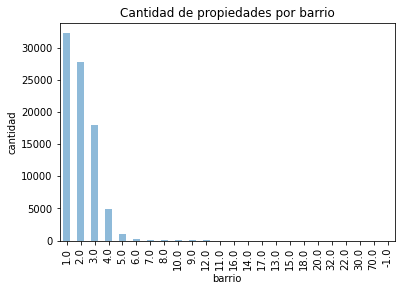

In [65]:
ds_bedrooms = ds_cuantitativo["property_bedrooms"].value_counts()
grf_ds=ds_bedrooms.plot.bar(alpha=0.5 , title="Cantidad de propiedades por barrio" , xlabel="barrio" , ylabel="cantidad")

###Medidas de resumen variables cualitativas

Tipos y cantidades de propiedades

In [67]:
ds_cualitativo = ds_exploracion.copy()
ds_cualitativo = ds_cualitativo.loc[:,["property_type", "start_date", "end_date"]]
ds_cualitativo.property_type.value_counts()

Departamento     81871
PH                9332
Casa              4292
Casa de campo        7
Name: property_type, dtype: int64

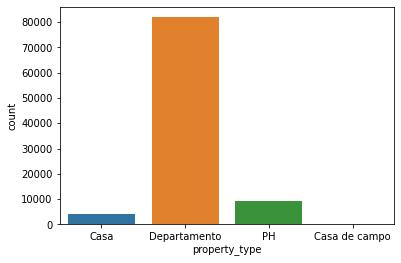

In [68]:
sns.countplot(x="property_type", data=ds_cualitativo)
plt.show()

Cantidad de propiedades publicadas por mes # vale la pena esto?

In [69]:
ds_meses = ds_cualitativo.loc[:,["start_date"]]
ds_meses["month"] = ds_meses["start_date"].dt.month
ds_meses = ds_meses["month"].value_counts()
ds_meses.sort_index(inplace=True)

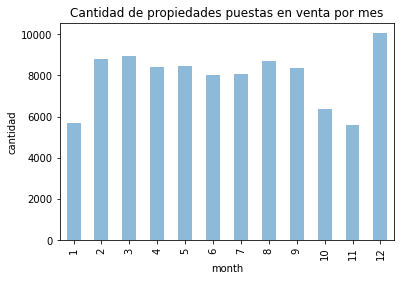

In [70]:
grf_ds=ds_meses.plot.bar(alpha=0.5 , title="Cantidad de propiedades puestas en venta por mes" , xlabel="month" , ylabel="cantidad")

Cantidad de propiedades vendidas por mes

In [71]:
ds_meses = ds_cualitativo.loc[:,["end_date"]]
ds_meses["month"] = ds_meses["end_date"].dt.month
ds_meses = ds_meses["month"].value_counts()
ds_meses.sort_index(inplace=True)

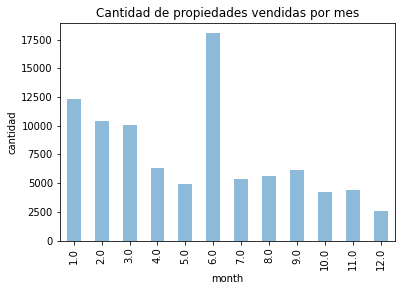

In [72]:
grf_ds=ds_meses.plot.bar(alpha=0.5 , title="Cantidad de propiedades vendidas por mes" , xlabel="month" , ylabel="cantidad")

Cantidad de propiedades por barrio en Capital Federal

In [73]:
ds_zona_propiedad = ds_exploracion.copy()
ds_zona_propiedad = ds_zona_propiedad[["place_l2",	"place_l3",	"place_l4"]]

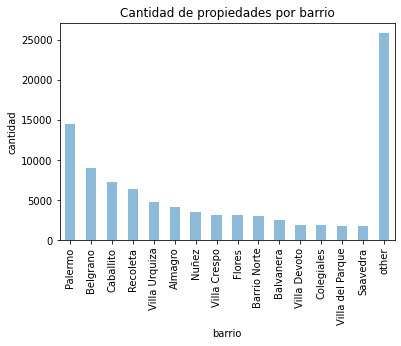

In [74]:
ds_barrios = ds_zona_propiedad["place_l3"].value_counts()
ds_barrios_mas_sign = ds_barrios[0:15]
ds_barrios_menos_sign = ds_barrios[15:]
ds_barrios_menos_sign = ds_barrios_menos_sign.reset_index(name="cantidad").rename(columns={"index" : "barrio"})
ds_barrios_mas_sign["other"] = ds_barrios_menos_sign["cantidad"].sum()
grf_ds = ds_barrios_mas_sign.plot.bar(alpha=0.5, title="Cantidad de propiedades por barrio" , xlabel="barrio" , ylabel="cantidad")

Precio promedio de propiedades por barrio

### Correlacione existente entre las variables

Precio promedio de propiedad por Barrio

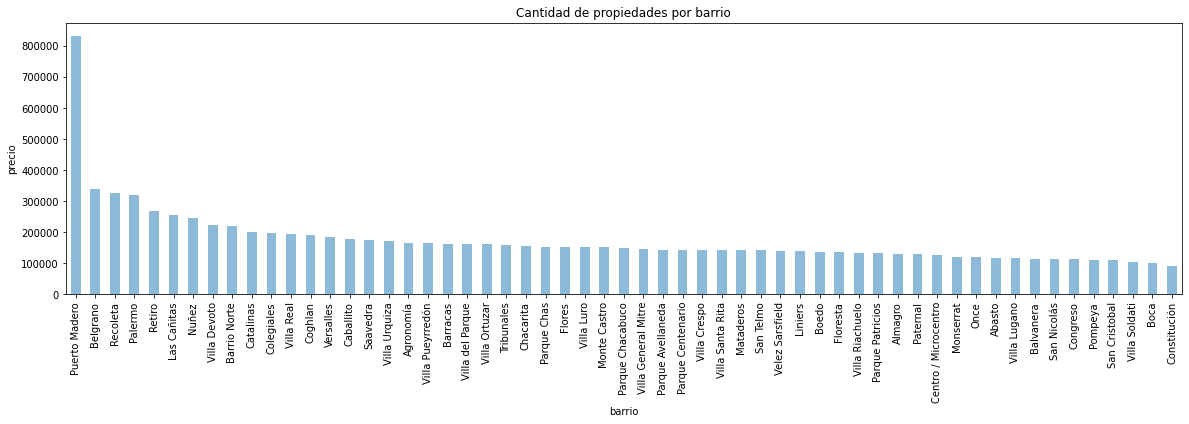

In [94]:
ds_precio_prom = ds_exploracion.copy()
ds_precio_prom = ds_precio_prom.groupby(["place_l3"])["property_price"].mean().sort_values(ascending=False)
grf_ds=ds_precio_prom.plot.bar(alpha=0.5 , title="Cantidad de propiedades por barrio" , xlabel="barrio" , ylabel="precio", figsize=(20,5))

Precio promedio de propiedades por Dormitorio


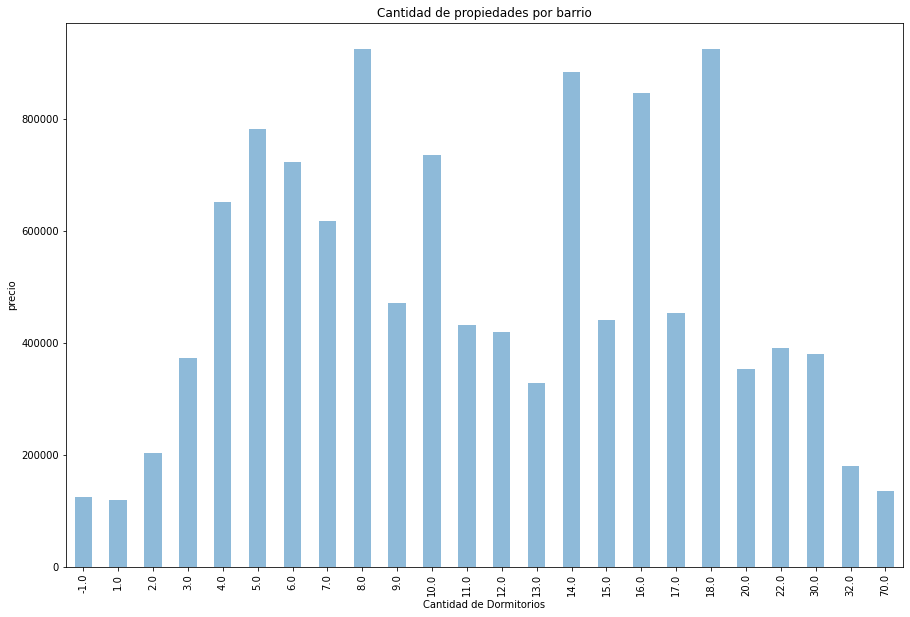

In [100]:
ds_precio_por_dorm = ds_exploracion.copy()
ds_precio_por_dorm = ds_precio_por_dorm.groupby("property_bedrooms")["property_price"].mean()
grf_ds=ds_precio_por_dorm.plot.bar(alpha=0.5 , title="Cantidad de propiedades por barrio" , xlabel="Cantidad de Dormitorios" , ylabel="precio", figsize=(15,10))

Precio promedio de propiedades por Habitacion

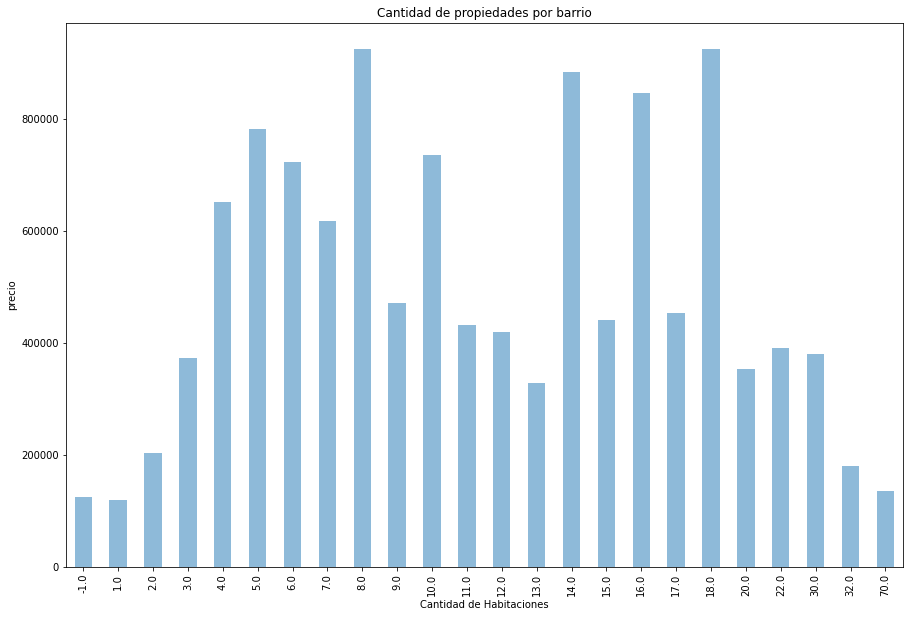

In [101]:
ds_precio_por_hab = ds_exploracion.copy()
ds_precio_por_hab = ds_precio_por_hab.groupby("property_rooms")["property_price"].mean()
grf_ds=ds_precio_por_dorm.plot.bar(alpha=0.5 , title="Cantidad de propiedades por barrio" , xlabel="Cantidad de Habitaciones" , ylabel="precio", figsize=(15,10))